## 21 - LCL, LFC, EL

Watch video: [YouTube](https://www.youtube.com/watch?v=kGljsludKtk)

- **LCL** (Lifted condensation level): It is formally defined as the height at which the relative humidity (RH) of an air parcel will reach 100% with respect to liquid water when it is cooled by dry adiabatic lifting.
- **LFC** (Level of free convection): It is the level above the LCL where an air parcel becomes warmer than the surrounding air and thus will continue to rise if it is given an upward push.
- **EL** (Equilibrium level): It is the height at which a rising parcel of air is at the same temperature as its environment.

In [1]:
import warnings
import datetime
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
import metpy.calc as mpcalc
import metpy.plots as mpplots
from metpy.units import pandas_dataframe_to_unit_arrays
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
time = datetime.datetime(2012, 4, 14, 12, 0, 0)
df = WyomingUpperAir.request_data(time, 'OUN')

In [3]:
df = pandas_dataframe_to_unit_arrays(df)
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']

In [4]:
print(mpcalc.lcl(p[0], T[0], Td[0]))

(<Quantity(929.723942, 'hectopascal')>, <Quantity(17.5430409, 'degree_Celsius')>)


In [5]:
warnings.filterwarnings('ignore', category=UserWarning)
print(mpcalc.lfc(p, T, Td))

(<Quantity(907.397913, 'hectopascal')>, <Quantity(16.646438, 'degree_Celsius')>)


In [6]:
print(mpcalc.el(p, T, Td))

(<Quantity(193.88397, 'hectopascal')>, <Quantity(-62.7984734, 'degree_Celsius')>)


In [7]:
lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)

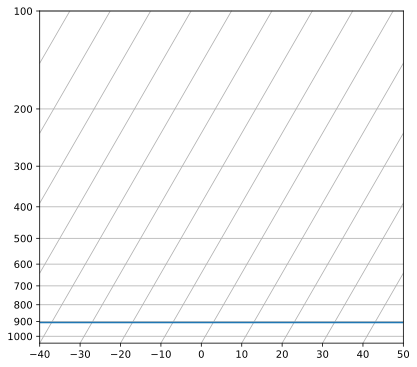

In [9]:
fig = plt.figure(1, figsize=(8, 6))
skew = mpplots.SkewT(fig)
if lfc_pressure:
    skew.ax.axhline(lfc_pressure)
plt.show()